This file is a helper file for the Enron email classification project. Some of the codes are adapted from poi_id.py.

There are two parts, **the first part is about data analysis, and the second part is the running of the file poi_id.py.**

# First part, data analysis

In [196]:
import sys
import pickle
import pandas as pd
import numpy as np
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit

In [213]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
# delete the key 'TOTAL'
del data_dict['TOTAL']

print len(data_dict)
# transform data_dict to dataframe
data_df = pd.DataFrame.from_dict(data_dict)
data_df = pd.DataFrame.transpose(data_df)

145


In [198]:
data_df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [199]:
# delete the email_address column and poi column
del data_df['email_address']
del data_df['poi']
data_df.shape

(145, 19)

In [200]:
# replace all the NaNs by 0
data_df = data_df.replace('NaN',0)
data_df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,0,1729541,13868,2195,47,65,0,304805,152,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,0,178980,0,0,257817,3486,0,0,0,0,0,0,0,0,0,0,0,182466,257817
BANNANTINE JAMES M,0,0,-5104,0,4046157,56301,29,39,0,0,0,864523,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,0,6680544,11200,0,0,0,0,1586055,2660303,3942714,0,267102,0,0,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,0,0,129142,0,0,0,0,0,69,145796,-82782,239671,0,0,827696,63014


In [201]:
# check portion of zero values for each column, I do not want to delete them, but want to have a sense
(data_df == 0).sum()/144.

bonus                        0.444444
deferral_payments            0.743056
deferred_income              0.673611
director_fees                0.895833
exercised_stock_options      0.305556
expenses                     0.354167
from_messages                0.409722
from_poi_to_this_person      0.493056
from_this_person_to_poi      0.548611
loan_advances                0.986111
long_term_incentive          0.555556
other                        0.368056
restricted_stock             0.250000
restricted_stock_deferred    0.888889
salary                       0.354167
shared_receipt_with_poi      0.409722
to_messages                  0.409722
total_payments               0.145833
total_stock_value            0.138889
dtype: float64

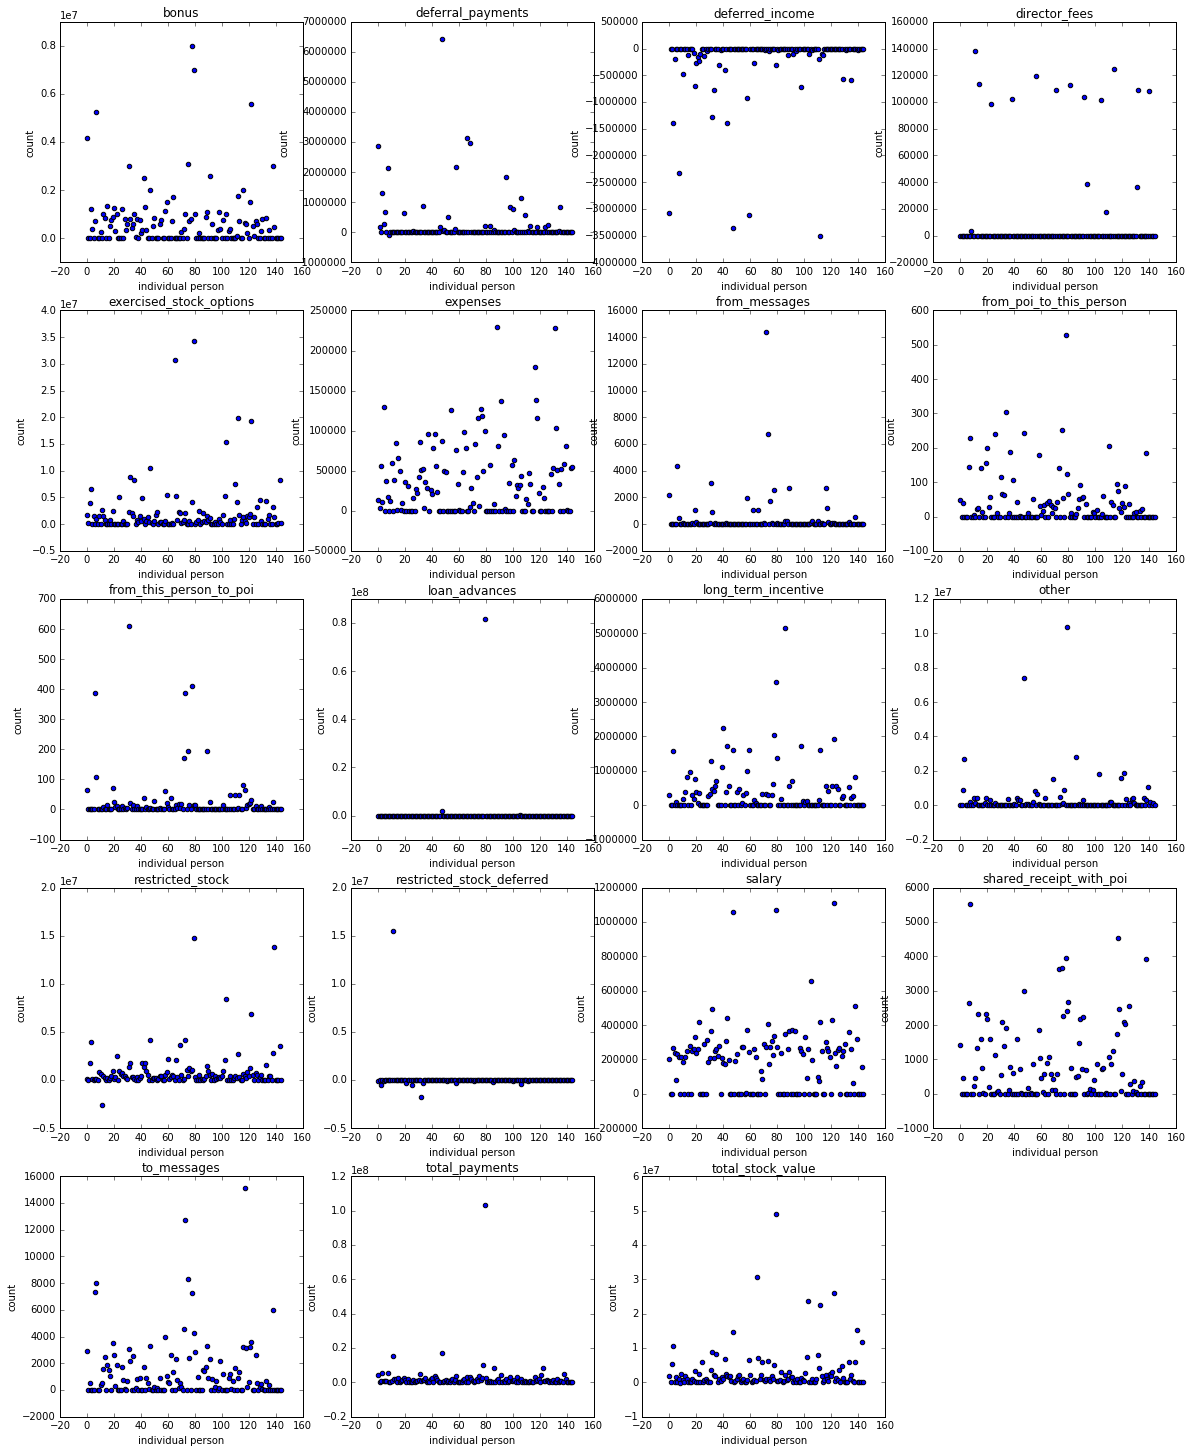

In [202]:
# check for outliers
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 20,25
rown = 5;coln = 4;

ii = 0
for col in data_df:
    ii += 1
    plt.subplot(rown,coln,ii)
    plt.scatter(np.arange(145),data_df[col])
    plt.title(col)
    plt.xlabel('individual person')
    plt.ylabel('count')
plt.show()

In [203]:
# let's see who are those outliers
print data_df['loan_advances'].idxmax(axis=0)
print data_df['restricted_stock_deferred'].idxmax(axis=0)
print data_df['total_payments'].idxmax(axis=0)

LAY KENNETH L
BHATNAGAR SANJAY
LAY KENNETH L


In [204]:
# check whether they are pois
print labels[data_df.index.get_loc('LAY KENNETH L')]
print labels[data_df.index.get_loc('BHATNAGAR SANJAY')]

1.0
0.0


# Second part, running of poi_id.py

In [262]:
# running of the whole poi_id.py file
%run poi_id.py

Tester Classification report
Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=5, score_func=<function f_classif at 0x107122050>)), ('naive_bayes', GaussianNB(priors=None))])
	Accuracy: 0.85233	Precision: 0.43269	Recall: 0.34550	F1: 0.38421	F2: 0.36001
	Total predictions: 15000	True positives:  691	False positives:  906	False negatives: 1309	True negatives: 12094

